# Getting Acquainted with Visualizing Data in `R`

Up to this point, we have only used base `R` to visualize our data. Today, we are going to build upon our knowledge of plotting. We will be learning the ins and outs of an `R` package called `ggplot2`, which provides a flexible grammar for plotting your data.

<img src="../images/ds_wheel.png">

We will be working with several datasets that come built-in to `ggplot2` for this lab as well as the practice. The first dataset we will be dealing with is the `iris` dataset.

### Iris Data

This is a built-in dataset in `R` that measures certain characteristics of different species of Iris plants. It can be view in the same way that you would call another data frame by simply calling `iris`. Nothing needs to be loaded from a file as it is already built-in. We will be using this and other files to scrape the surface of data visualizations.

In [1]:
library(ggplot2)
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


### Simple Plots in `R`

Below is an example of base `R`'s method for plotting variables. As we have seen before, it will produce different types of plots given different context, normally, in attempts to be helpful. However, it is rather complicated to customize. Take a look at the example below.


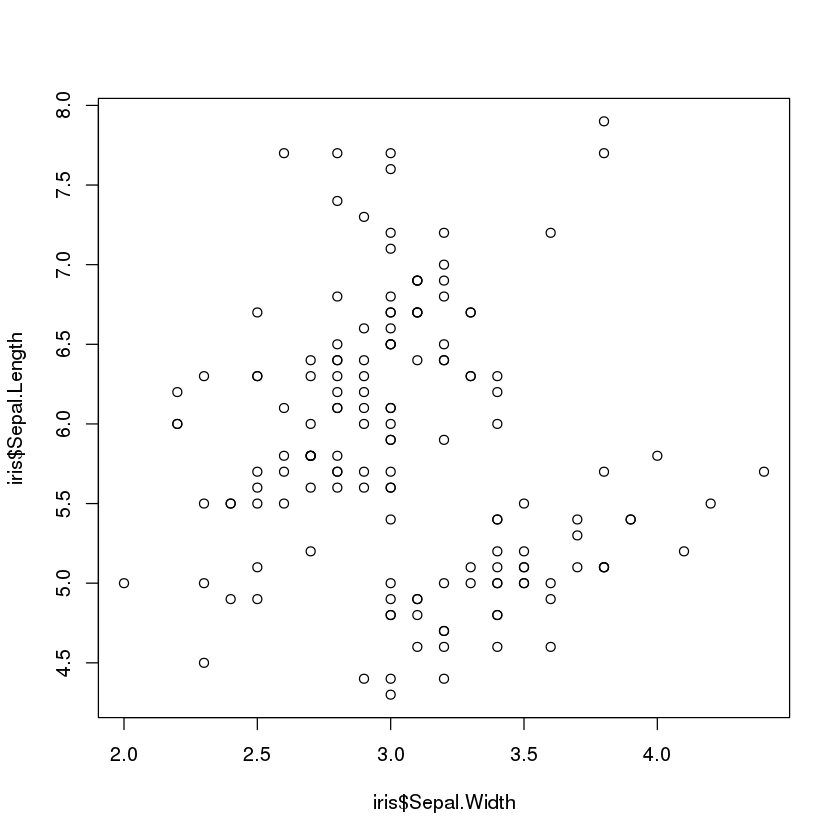

In [2]:
plot(iris$Sepal.Width, iris$Sepal.Length)

plot(<font color='green'>iris\$Sepal.Width</font>,<font color='blue'>iris\$Sepal.Length</font>)

- <font color='green'>x-variable : iris\$Sepal.Width</font>

- <font color='blue'>y-variable : iris\$Sepal.Length</font>


In order to visualize what exactly we are plotting, here is an example of the sepal length in width on actual iris flower.

<img src="../images/iris.jpg">

However, this plot doesn't give us a whole lot of information about the relationship of sepal length given sepal width. Is there more information that we could include in this visual analysis? What if we account for the different species? Will that change the visualization?

###  Plotting in `R` with `ggplot2`

Before we start accounting for different species, it is first important to introduce the `ggplot2` package.  This is a plotting package that is extremely popular as it allows individuals to plot their data according to a certain grammar (if this seems familiar, it is written by the [same individual](http://hadley.nz/) who wrote `dplyr`). In fact, the "gg" in in `ggplot2` stands for "the grammar of graphics". 

For the rest of this lab, we will be exploring the power of plotting with this grammar. We will start with making a simple scatter plot, like we did above with base `R`.

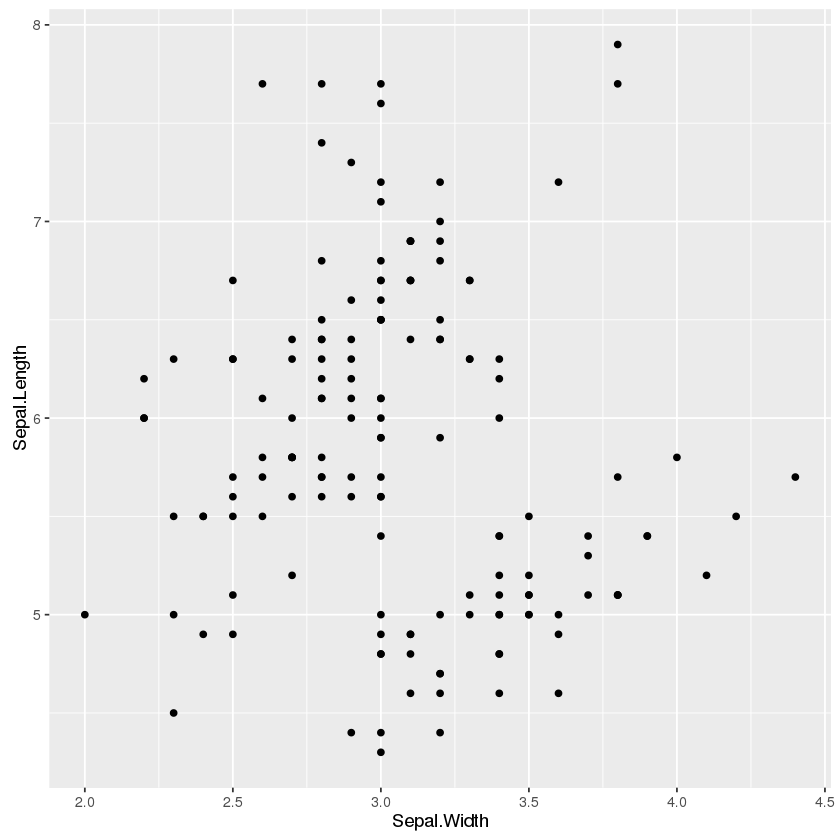

In [3]:
qplot(data = iris, x = Sepal.Width, y = Sepal.Length)

See the difference? We can go through the parameters of the `qplot()` function. `data` is simply the frame you wish to use for plotting. This makes it simpler to reference our variables and less repetitive. `x` is just the variable that should be mapped to the x-axis, and `y` is the y-axis variable. As you can see, all we have to do is pass the variable (column) name as the argument to these axes parameters.

But we can take this a step further. What if we wanted to visualize three variables? How might we do that? Well, if the third variable is categorical, we could use shape or color or both! to delineate between categories. 

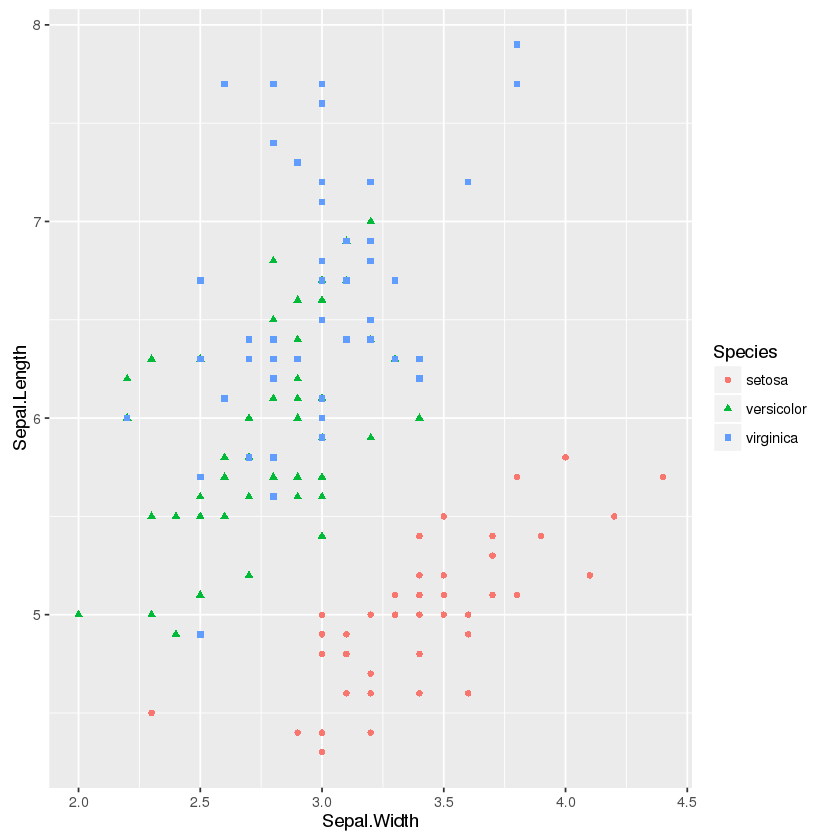

In [4]:
qplot(data = iris, x = Sepal.Width, y = Sepal.Length, colour = Species, shape = Species) 

Okay, so now the relationship between sepal width and sepal length is a bit clearer. When accounting for species, it appears that as the sepal width increases, so does the sepal length. Using both color and shape to delineate between species revealed this relationship.

Notice how works. You specify the variables that you wish to represent as different colors or shapes in the same way you would specify them to be the x or y axes. I will note here that a New Zealander wrote this package and therefore the parameter `colour` is spelled with a "u". Specifying `color` also works in order to accommodate for those in favor the American spelling, however, the majority of the time throughout these lessons, you will see it written `colour` because `<TAB>` complete defaults to this form.

Now, can we better visualize the relationship between sepal width and height? How about if we include a line depicting the linear relationship between the variables?

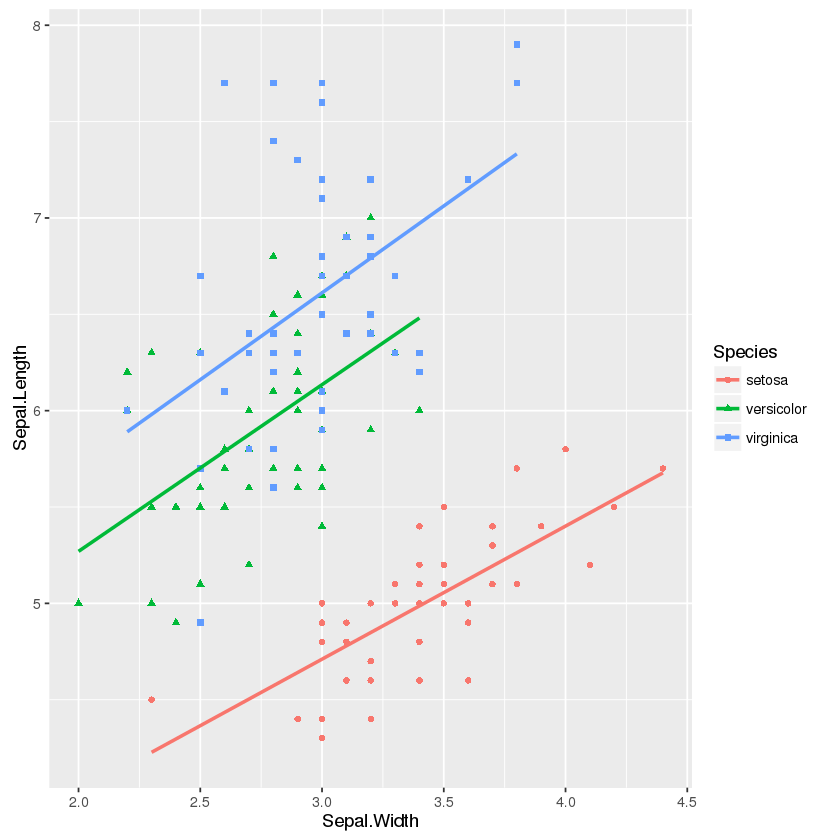

In [5]:
qplot(data = iris, x = Sepal.Width, y = Sepal.Length, colour = Species, shape = Species) + 
    geom_smooth(method = lm, se = FALSE)

There we have it! These lines depict the linear relationship between width and height. But you will notice something a little bit different. Instead of just having one function, we see a new one appended to it, `geom_smooth()`. This function adds a new geometric object to the plot, in this case a smooth. Notice the parameters of this function: `method` and `se`. For `method` we specify that we want the line to be the linear relationship and for `se` we specify `FALSE`, which removes the standard error shading around the lines. Feel free to play with these parameters to see how they modify the plot.

# Understanding the Basics of `ggplot2` Through Scatter Plots!!!

In order to understand the different components of `ggplot2` and, ultimately, how these components come together to make an effective plot, we are going to be dealing with another default dataset of `ggplot2`. It is called `mpg` and it records different attributes about vehicles including how many miles per gallon each get. Let's first use `R`'s help in order to get some documentation about `mpg`. 

In [6]:
?mpg

mpg {ggplot2},R Documentation


### Simple Scatter

We will begin by looking at two variables. Let's just say that we are interested in the engine displacement and how it affects a vehicle's highway miles per gallon. If you are not familiar with what engine displacement is, [here is a Wikipedia article](https://en.wikipedia.org/wiki/Engine_displacement) for a bit more information. 

We will begin with a simple scatter plot of these two variables. As is custom, the independent variable is on the x-axis and the dependent is on the y-axis.

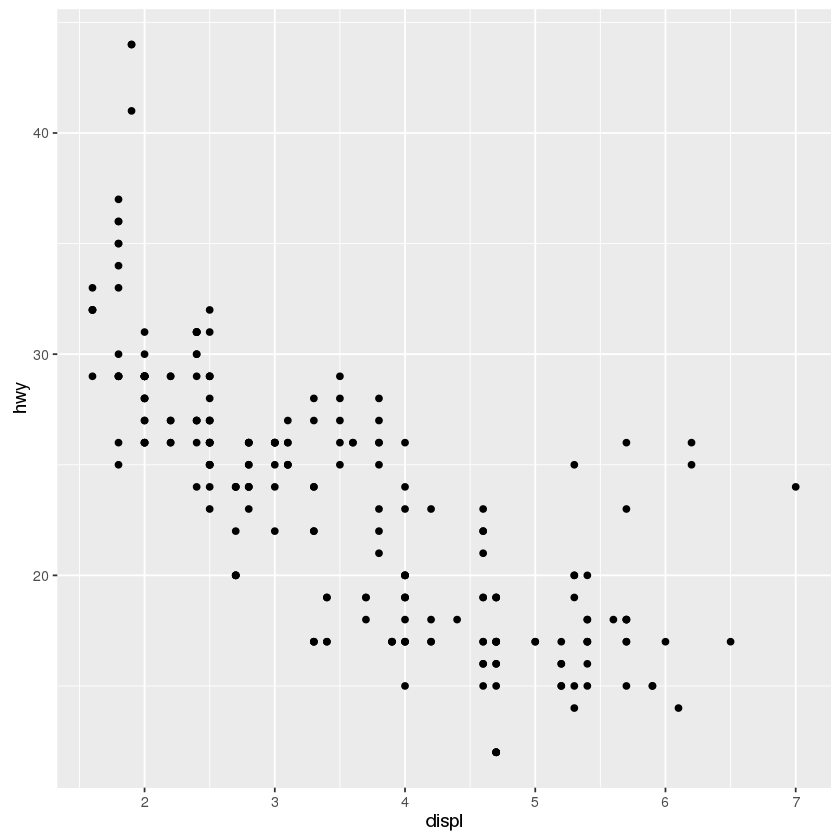

In [7]:
qplot(displ, hwy, data = mpg)

Okay, so there are a couple of things to note here. The first is the order of the arguments. The order is a bit different than the example that we used when plotting the iris variables. Here, `qplot` interprets the first argument as the x-axis, the second as the y-axis, and that data is specified using the explicit declaration form of "`data = mpg`". Honestly, either method is fine. You can either explicitly define the x and y axes by using the "`x = displ, y = hwy`" method, or using the ordered method used above.

Secondly, there is a fairly clear linear trend happening here. But could we add any more information to better explain the trend? If so, then how?

## Aesthetics

Aesthetics are visual characteristics that can be mapped to data. Examples of this include shape, size and color.

<img src="../images/aesthetics.png">

Let's start with color. We can map the vehicle `class` onto the plot below:

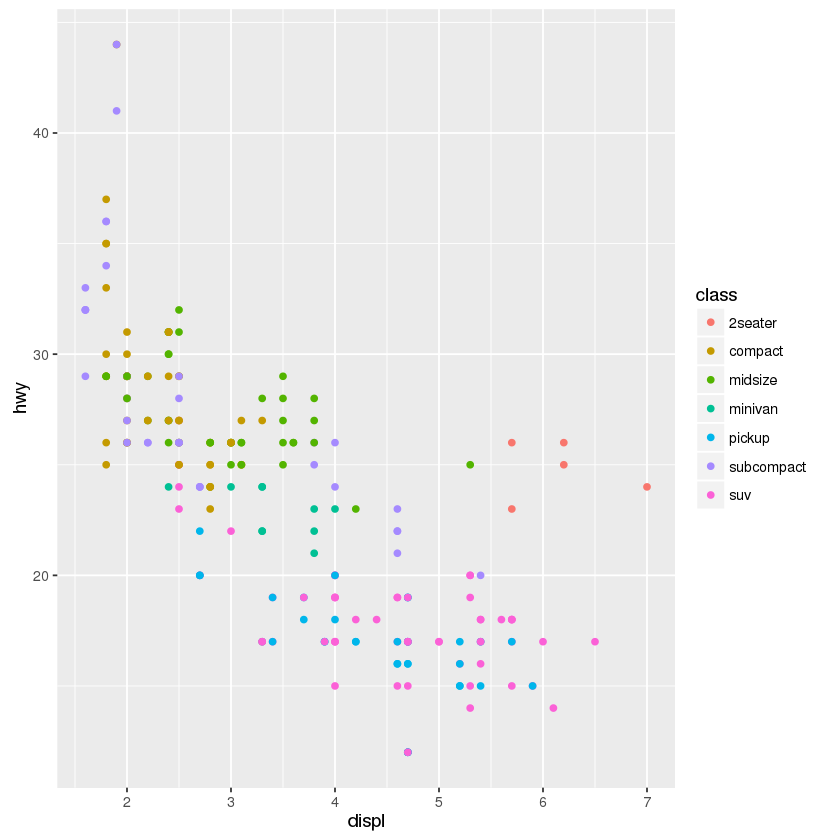

In [8]:
ggplot(data = mpg, aes(x = displ, y = hwy, colour = class)) + geom_point()

Notice the function that was used this time, `ggplot()`. `qplot()` is good for quick plots for investigation, but if you are creating visuals and want greater flexibility, `ggplot()` is the way to go. The syntax is a bit more complicated but we will be discussing each component as we go along. 

In this case, we were working with color to delineate the `class` of vehicles. This gives us a bit more insight into some interesting features of this dataset, such as what is that collection of dots with a displacement between 5.5 and 7, but have a highway mpg of around 25. We can now see that those are 2 seater cars. 

We can also add another dimension with a different aesthetic. Let's go ahead and do this with `cty` or city miles per gallon.

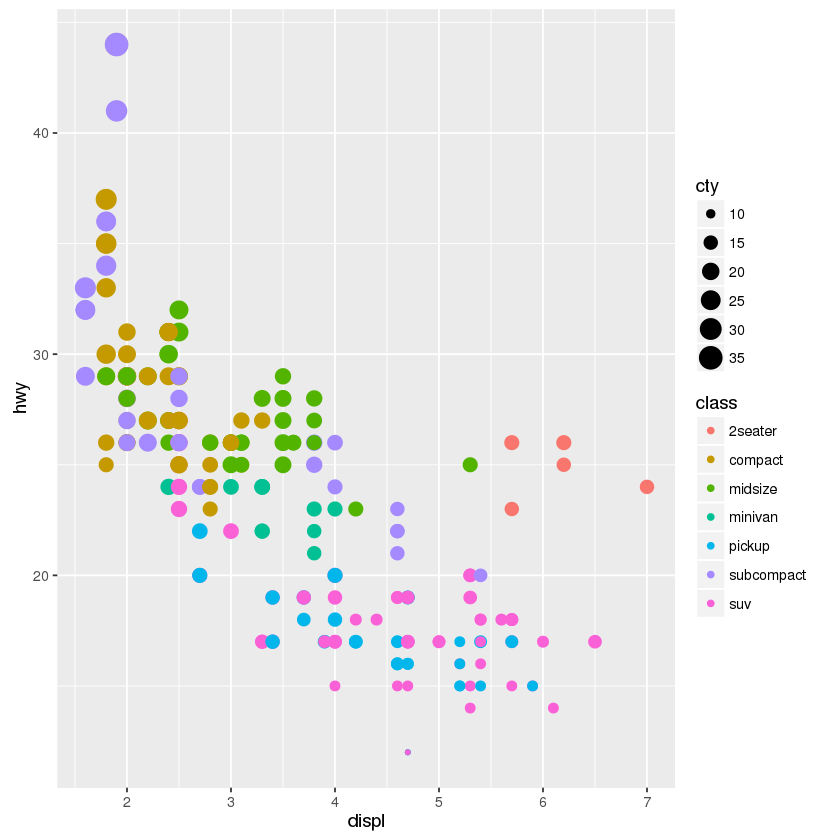

In [9]:
ggplot(data = mpg, aes(x = displ, y = hwy, size = cty, colour = class)) + geom_point()

Okay, so we used size to depict the city miles per gallon, the less mpg, the smaller the size of the point. That being said, this graph is rather intuitive and follows a similar trend to that of the highway miles per gallon. 

But this is a good place to interrupt. Just because we can map all of the variables, doesn't mean we should. We must be selective about what information will best convey our results effectively. Adding dimension upon dimension often gets very confusing. 

Now how about when to use these different aesthetics?

aesthetic | discrete variable | continuous variable 
----------|----------|------------
**`colour`**| rainbow of colors | gradient of colors 
**`size`**| discrete size steps | linear mapping between radius and value
**`shape`**| different shape per category | doesn't make sense and therefore is impossible

<img src="../images/aes_disc_con.png">

## Faceting

Faceting is the ability to partition the plots up into subsets of data and visualize them on separate smaller plots. This is often good for exploring conditional relationships and visualizing large amounts of data.

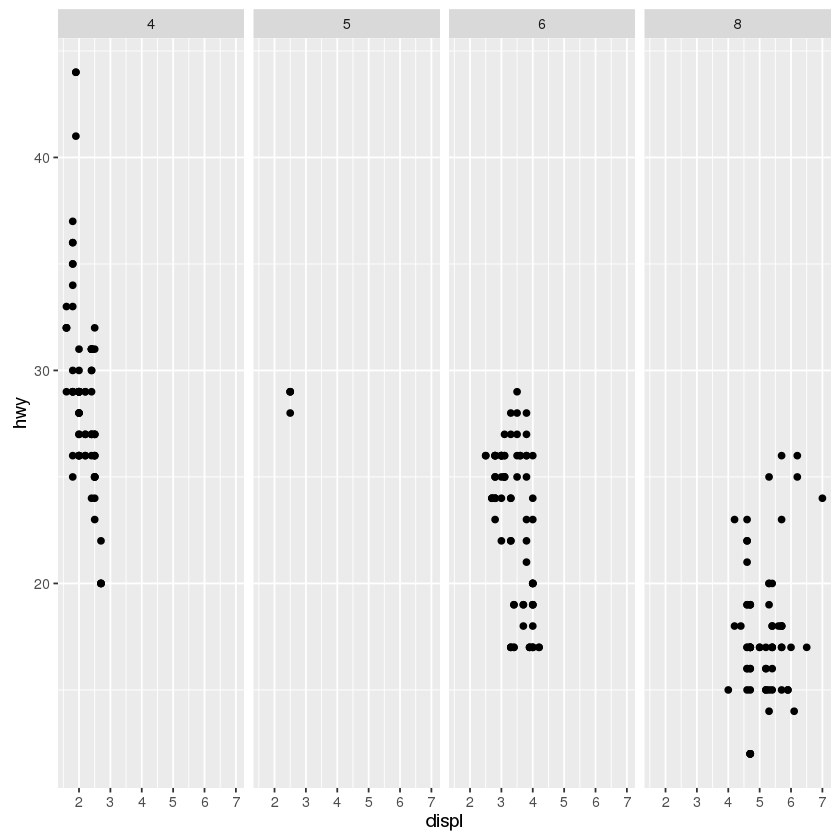

In [10]:
ggplot(data = mpg, aes(x = displ, y = hwy)) + geom_point() + facet_grid(.~cyl)

In the above example, we partitioned the data into smaller graphs based on the number of cylinders the vehicle has (4, 5, 6, or 8). Now, the syntax looks a little strange within the `facet_grid()` function. What you are telling it in this example is plot the data against the categories of `cyl`. You could also create a facet based on two variables. Take a look at the example below:

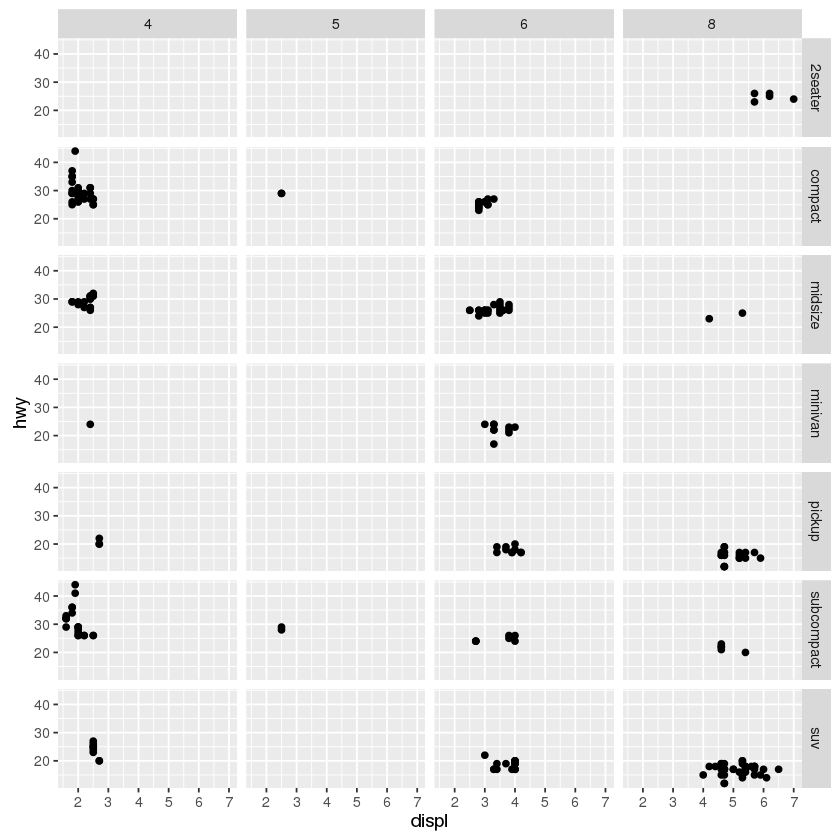

In [11]:
ggplot(data = mpg, aes(x = displ, y = hwy)) + geom_point() + facet_grid(class~cyl)

So now we have partitioned the data into smaller graphs based on both the number of cylinders and the class of vehicle.

This is a good time to discuss the difference between `facet_grid()` and `facet_wrap()`:

**`facet_grid`** will display a plot whether or not data exists. Take a look at the example above for 4, 5 and 6 cylinders for the 2 seater class. It will display the plots in grid output.

**`facet_wrap`** will condense the output to only plots that will contain data. Notice below how those where there were no data for `facet_grid` are not displayed.

In [ ]:
ggplot(data = mpg, aes(x = displ, y = hwy)) + geom_point() + facet_wrap(class~cyl)

## Geoms

There are other ways to display data other than a scatter. Geoms are how you specify the type of graph or, in other words, what the graph draws. So far we have been specifying `geom_point()`, which creates a scatter plot, but let's take a look at some other options.

In [ ]:
ggplot(data = mpg, aes(x = displ, y = hwy))  + geom_smooth()

This is a smooth and it draws a line depicting the trend in the data. It defaults to a LOESS line but you can also specify other methods of smoothing such as linear by setting the method parameter. Take a look below:

In [ ]:
ggplot(data = mpg, aes(x = displ, y = hwy))  + geom_point(aes(colour = class)) + 
    geom_smooth(method = "lm", se = FALSE)

Take a good look at the block above. For the `geom_smooth()` we have a couple of new parameters. One is the `method`. This argument `"lm"` tells ggplot that we want a linear line instead of a LOESS. The `se` parameter is set to `FALSE` so that the standard error ribbon isn't mapped to the plot. Also notice where we specify the color of the points. We do it within the `geom_point()` because if we specified in in the `ggplot()` function, it would have drawn separate lines for each `class`. Let's see what that would look like below.

In [ ]:
ggplot(data = mpg, aes(x = displ, y = hwy, colour = class))  + geom_point() + 
    geom_smooth(method = "lm", se = FALSE)

In [ ]:
ggplot(data = mpg, aes(x = class, y = hwy)) + geom_boxplot()

So this is going to be the final plot of this lab, but don't worry, we will cover a lot more. This is a boxplot of highway mpg per each class of vehicle that is in the dataset. 

Be sure to take a look at the `ggplot2` [documentation](http://docs.ggplot2.org/current/) as it is extensive and full of good examples of how to use their different geoms. 

In the practice we will continue with `ggplot2` methods including handling large data, and some techniques for customizing your plots. 